# Random Forest Classifier 

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

## Carga del dataset

In [2]:
# Cargar el dataset
file_path = 'diabetes.csv'
diabetes_dataset = pd.read_csv(file_path)

# Visualizar las primeras filas del dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploración y preprocesamiento de datos

In [3]:
# Inspeccionar información del dataset
diabetes_dataset.info()

# Resumen estadístico
diabetes_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## División del conjunto de datos

In [4]:
# Separar características y variable objetivo
X = diabetes_dataset.drop(columns=['Outcome'])
y = diabetes_dataset['Outcome']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Entrenamiento del modelo Random Forest

In [5]:
# Entrenar un modelo Random Forest
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluación del modelo

In [6]:
# Realizar predicciones y evaluar el modelo
y_pred = clf.predict(X_test)

# Calcular métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Precisión: {accuracy:.2f}')
print(report)

Precisión: 0.76
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



## Análisis de resultados

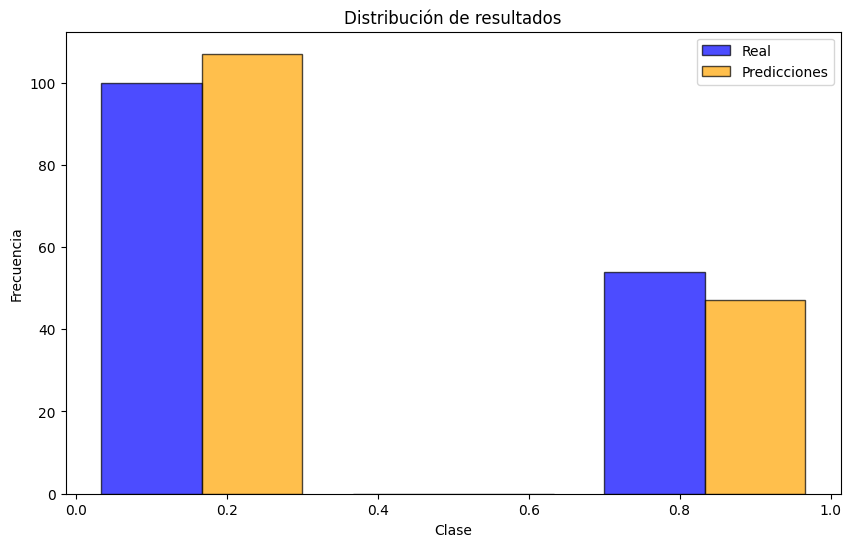

In [7]:
# Comparar las predicciones con los valores reales
plt.figure(figsize=(10, 6))
plt.hist([y_test, y_pred], label=['Real', 'Predicciones'], bins=3, color=['blue', 'orange'], edgecolor='black', alpha=0.7)
plt.title('Distribución de resultados')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

## Evaluación y optimización del modelo

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir el modelo base
clf = RandomForestClassifier(random_state=42)

# Rango de hiperparámetros
param_distributions = {
    'n_estimators': randint(50, 500),          # Número de árboles
    'max_depth': [None, 10, 20, 30, 40],       # Profundidad máxima
    'min_samples_split': randint(2, 10),       # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': randint(1, 5),         # Mínimo de muestras en una hoja
    'criterion': ['gini', 'entropy'],          # Función para medir la calidad de la división
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=clf,
                                   param_distributions=param_distributions,
                                   n_iter=50,            # Número de combinaciones a probar
                                   scoring='accuracy',   # Métrica de evaluación
                                   cv=3,                 # Validación cruzada
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)            # Paralelización

# Ejecutar la búsqueda
random_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("Mejores hiperparámetros:", random_search.best_params_)
print("Mejor precisión:", random_search.best_score_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 64}
Mejor precisión: 0.7834210106806951


In [13]:
from sklearn.model_selection import GridSearchCV

# Rango ajustado basado en los resultados de Random Search
param_grid = {
    'n_estimators': [60, 64, 70],           # Explorar alrededor de 64
    'max_depth': [15, 20, 25],             # Explorar alrededor de 20
    'min_samples_split': [6, 8, 10],       # Explorar alrededor de 8
    'min_samples_leaf': [1, 2, 3],         # Explorar alrededor de 1
    'criterion': ['gini', 'entropy']       # Comparar gini y entropy
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',  # Usar precisión como métrica
                           cv=3,                # Validación cruzada con 3 folds
                           verbose=2,
                           n_jobs=-1)           # Usar todos los núcleos disponibles

# Ejecutar Grid Search
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y precisión
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor precisión:", grid_search.best_score_)


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 64}
Mejor precisión: 0.7834210106806951


## Gráficas personalizadas

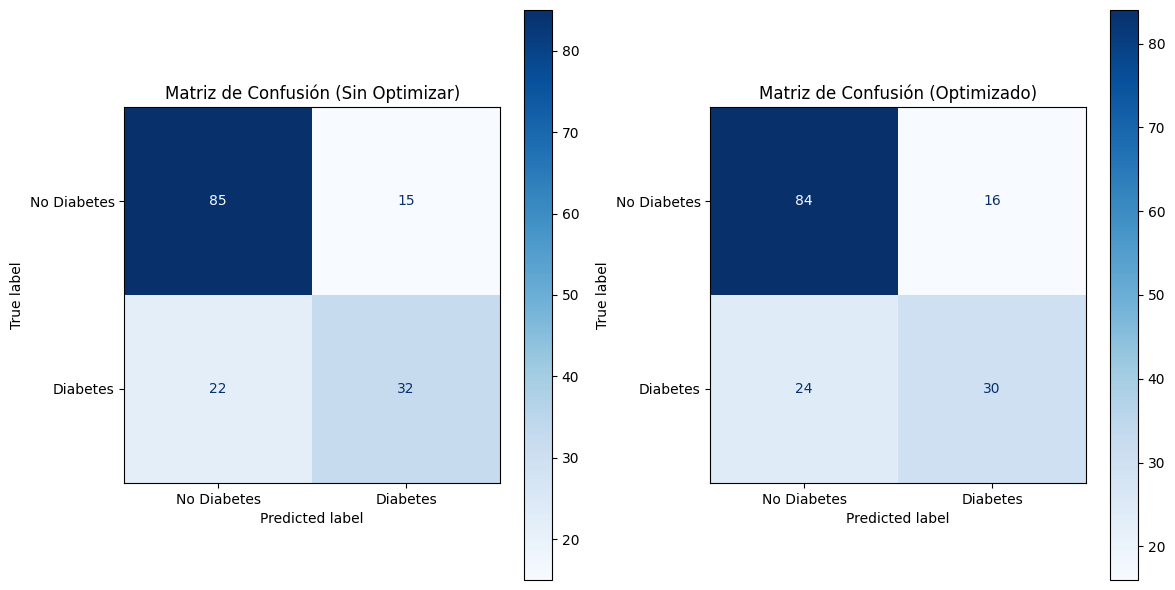

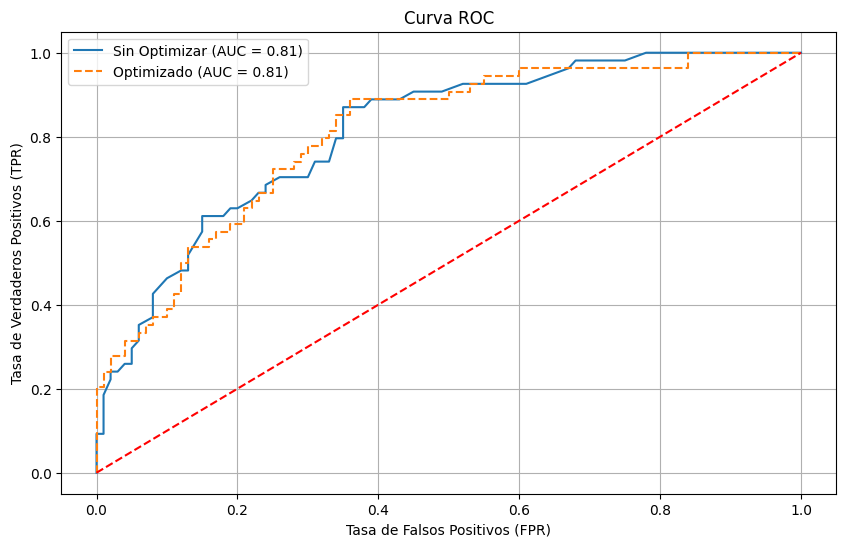

In [18]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Asegurarse de que los modelos están ajustados
if not hasattr(clf, "n_classes_"):  # Entrenar el modelo base si no está ajustado
    clf.fit(X_train, y_train)

if not hasattr(grid_search.best_estimator_, "n_classes_"):  # Entrenar el modelo optimizado si no está ajustado
    grid_search.best_estimator_.fit(X_train, y_train)

# Predicciones del modelo sin optimizar
y_pred_unoptimized = clf.predict(X_test)
y_proba_unoptimized = clf.predict_proba(X_test)[:, 1]  # Probabilidades sin optimizar

# Predicciones del modelo optimizado
y_pred_optimized = grid_search.best_estimator_.predict(X_test)
y_proba_optimized = grid_search.best_estimator_.predict_proba(X_test)[:, 1]  # Probabilidades optimizadas

# Gráficas de comparación
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Matriz de confusión sin optimizar
cm_unoptimized = confusion_matrix(y_test, y_pred_unoptimized)
disp_unoptimized = ConfusionMatrixDisplay(cm_unoptimized, display_labels=["No Diabetes", "Diabetes"])
disp_unoptimized.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title("Matriz de Confusión (Sin Optimizar)")

# Matriz de confusión optimizada
cm_optimized = confusion_matrix(y_test, y_pred_optimized)
disp_optimized = ConfusionMatrixDisplay(cm_optimized, display_labels=["No Diabetes", "Diabetes"])
disp_optimized.plot(ax=axes[1], cmap='Blues', values_format='d')
axes[1].set_title("Matriz de Confusión (Optimizado)")

plt.tight_layout()
plt.show()

# Curvas ROC
fpr_unoptimized, tpr_unoptimized, _ = roc_curve(y_test, y_proba_unoptimized)
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_proba_optimized)

roc_auc_unoptimized = auc(fpr_unoptimized, tpr_unoptimized)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

plt.figure(figsize=(10, 6))
plt.plot(fpr_unoptimized, tpr_unoptimized, label=f"Sin Optimizar (AUC = {roc_auc_unoptimized:.2f})")
plt.plot(fpr_optimized, tpr_optimized, label=f"Optimizado (AUC = {roc_auc_optimized:.2f})", linestyle='--')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("Curva ROC")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend()
plt.grid()
plt.show()
